Лабораторная работа №5

Кластеризация (k-средних, иерархическая)

Выполнила: Пучинкина Дарья Вячеславовна, ДПИ-15

# Загрузка данных:

1. Загрузить датасет по ссылке: https://archive.ics.uci.edu/dataset/109/wine.

2. Создать Python скрипт. Загрузить данные в датафрейм


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv('wine.data')
print(data)

     1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29   5.64  1.04  \
0    1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
1    1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
2    1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
3    1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
4    1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.75  1.05   
..  ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
172  3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
173  3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
174  3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
175  3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
176  3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

     3.92  1065  
0    3.40  1050  
1    3.17  1185  
2    3.45  1480  
3  

3. При необходимости, произвести стандартизацию данных с использованием preprocessing.StandardScaler() из sklearn


In [2]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 1:])

4. Понизить размерность пространства данных до размерности n , при которой
компоненты объясняют не менее 85% дисперсии данных.


In [3]:
pca = PCA(n_components=0.85, svd_solver='full')
pca_data = pca.fit_transform(data_scaled)
data_pca = pca.inverse_transform(pca_data)
print("Объясненная дисперсия компонентами PCA:", pca.explained_variance_ratio_)

Объясненная дисперсия компонентами PCA: [0.35983071 0.1924128  0.1117946  0.07111109 0.06628744 0.04960367]


# K-Mean

1. Провести кластеризацию методом k-средних. Вывести на экран значения центров кластер

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_pca)
print("Центры кластеров:", kmeans.cluster_centers_)
print("Количество наблюдений в каждом кластере:", pd.Series(kmeans.labels_).value_counts())

Центры кластеров: [[-0.94423415 -0.39868649 -0.48831248  0.15657309 -0.48550563 -0.08233187
   0.03081341 -0.02843178  0.06542759 -0.90376847  0.44035758  0.295
  -0.72050456]
 [ 0.16984517  0.8779465   0.17280106  0.50431972 -0.04070948 -1.0204572
  -1.18164966  0.77653182 -0.74913378  0.90860895 -1.18624851 -1.26826551
  -0.37168601]
 [ 0.86414944 -0.30919098  0.37585996 -0.58848454  0.55137786  0.94089982
   0.95510263 -0.61893536  0.55660704  0.20337531  0.52254806  0.74600887
   1.07850464]]
Количество наблюдений в каждом кластере: 0    65
2    61
1    51
Name: count, dtype: int64


2. Построить (графически) результаты классификации для признаков попарно (1 и 2, 2 и 3, ..., n -1 и n ), отобразить центры кластеров


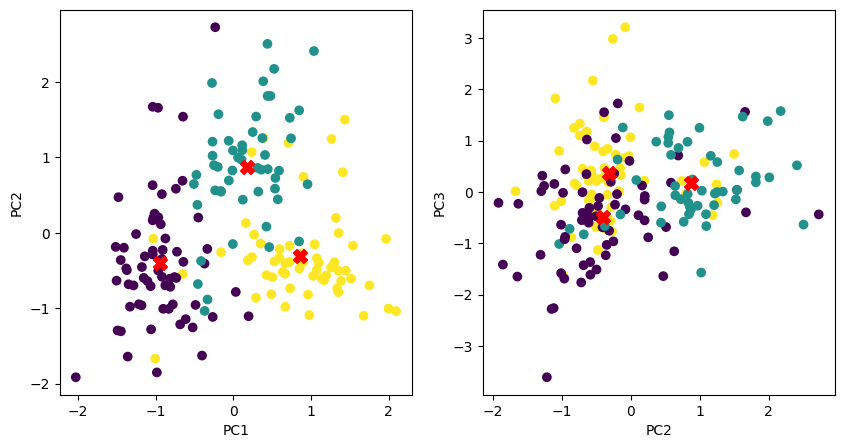

In [5]:
import matplotlib.pyplot as plt

pairs = [(0, 1), (1, 2)]  # пары признаков
plt.figure(figsize=(10, 5))
for i, (x, y) in enumerate(pairs):
    plt.subplot(1, len(pairs), i+1)
    plt.scatter(data_pca[:, x], data_pca[:, y], c=kmeans.labels_, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, x], kmeans.cluster_centers_[:, y], s=100, c='red', marker='X')
    plt.xlabel(f"PC{x+1}")
    plt.ylabel(f"PC{y+1}")
plt.show()

Дать пояснения:
1. На что влияет параметр n_init ?

    Параметр n_init задает количество запусков алгоритма K-средних с разными начальными точками для центров кластеров, что позволяет выбрать наилучшее разбиение (то, которое дает минимальную сумму квадратов расстояний до центров кластеров). Это помогает избежать локальных минимумов и увеличивает вероятность нахождения глобально оптимального решения.

2. Чему равно оптимальное значение для n_init ? Почему это оптимальное
значение?

    Оптимальное значение для n_init зависит от сложности данных, но обычно оно устанавливается в диапазоне от 10 до 20. В большинстве случаев значение n_init=10 является достаточным.

3. Что происходит при увеличении и уменьшении параметра n_init от
оптимального?

    Увеличение n_init повышает вероятность нахождения лучшего разбиения, так как алгоритм пробует больше разных начальных точек. Однако после определенного значения улучшения становятся незначительными, и это приводит к увеличению времени работы без существенного повышения качества кластеризации.

    Уменьшение n_init снижает вероятность нахождения оптимального решения, поскольку алгоритм будет использовать меньшее количество начальных значений для центров кластеров. Это может привести к менее точному результату, так как алгоритм может застрять в локальном минимуме.

4. По каким признакам произошло наилучшее разделение?

    Наилучшее разделение наблюдается на первой паре главных компонент PC1 и PC2. На этом графике кластеры выглядят более разнесенными и четко различимыми. В паре PC2 и PC3 наблюдается большее перекрытие точек, что делает разделение менее очевидным.

5. Как изменятся результаты, если в качестве метода инициализации выбрать random?

    При выборе init='random' начальные центроиды будут устанавливаться случайным образом, без какой-либо предварительной подготовки, что может привести к менее стабильным результатам.

3.Уменьшить размерность данных до n=2 используя метод
главных компонент и нарисовать карту для всей области значений,
на которой каждый кластер занимает определенную область со
своим цветом

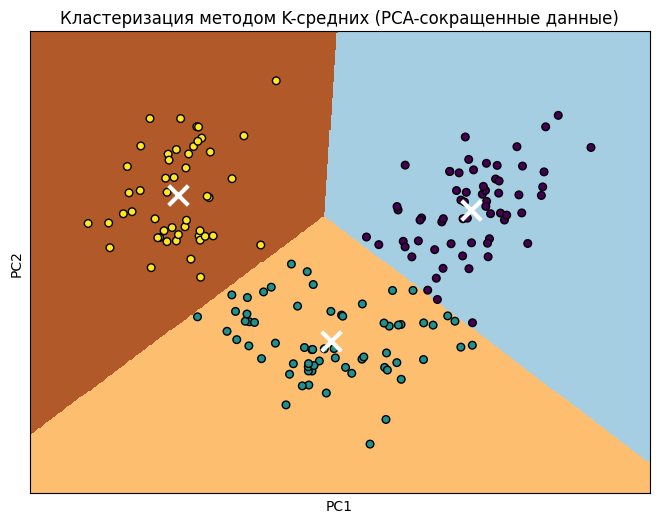

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Уменьшение размерности до 2 для визуализации кластеров
pca_2d = PCA(n_components=2)
data_pca_2d = pca_2d.fit_transform(data_scaled)

# Настройка и обучение модели K-средних
kmeans_2d = KMeans(n_clusters=3, init="k-means++", n_init=10, random_state=42)
kmeans_2d.fit(data_pca_2d)

# Установка размеров сетки для отображения областей значений кластеров
h = 0.02  # шаг сетки для увеличения качества отображения границ
x_min, x_max = data_pca_2d[:, 0].min() - 1, data_pca_2d[:, 0].max() + 1
y_min, y_max = data_pca_2d[:, 1].min() - 1, data_pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Прогноз значений для каждой точки на сетке
Z = kmeans_2d.predict(np.c_[xx.ravel(), yy.ravel()])

# Преобразуем результат в форму, подходящую для отрисовки
Z = Z.reshape(xx.shape)

# Отображение карты кластеров
plt.figure(figsize=(8, 6))
plt.imshow(Z, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=kmeans_2d.labels_, cmap='viridis', s=30, edgecolor='k')

centroids = kmeans_2d.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=200, linewidths=3, color="white", zorder=10)

plt.title("Кластеризация методом K-средних (PCA-сокращенные данные)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


4. Исследуйте работу алгоритма k-средних при различных параметрах init.

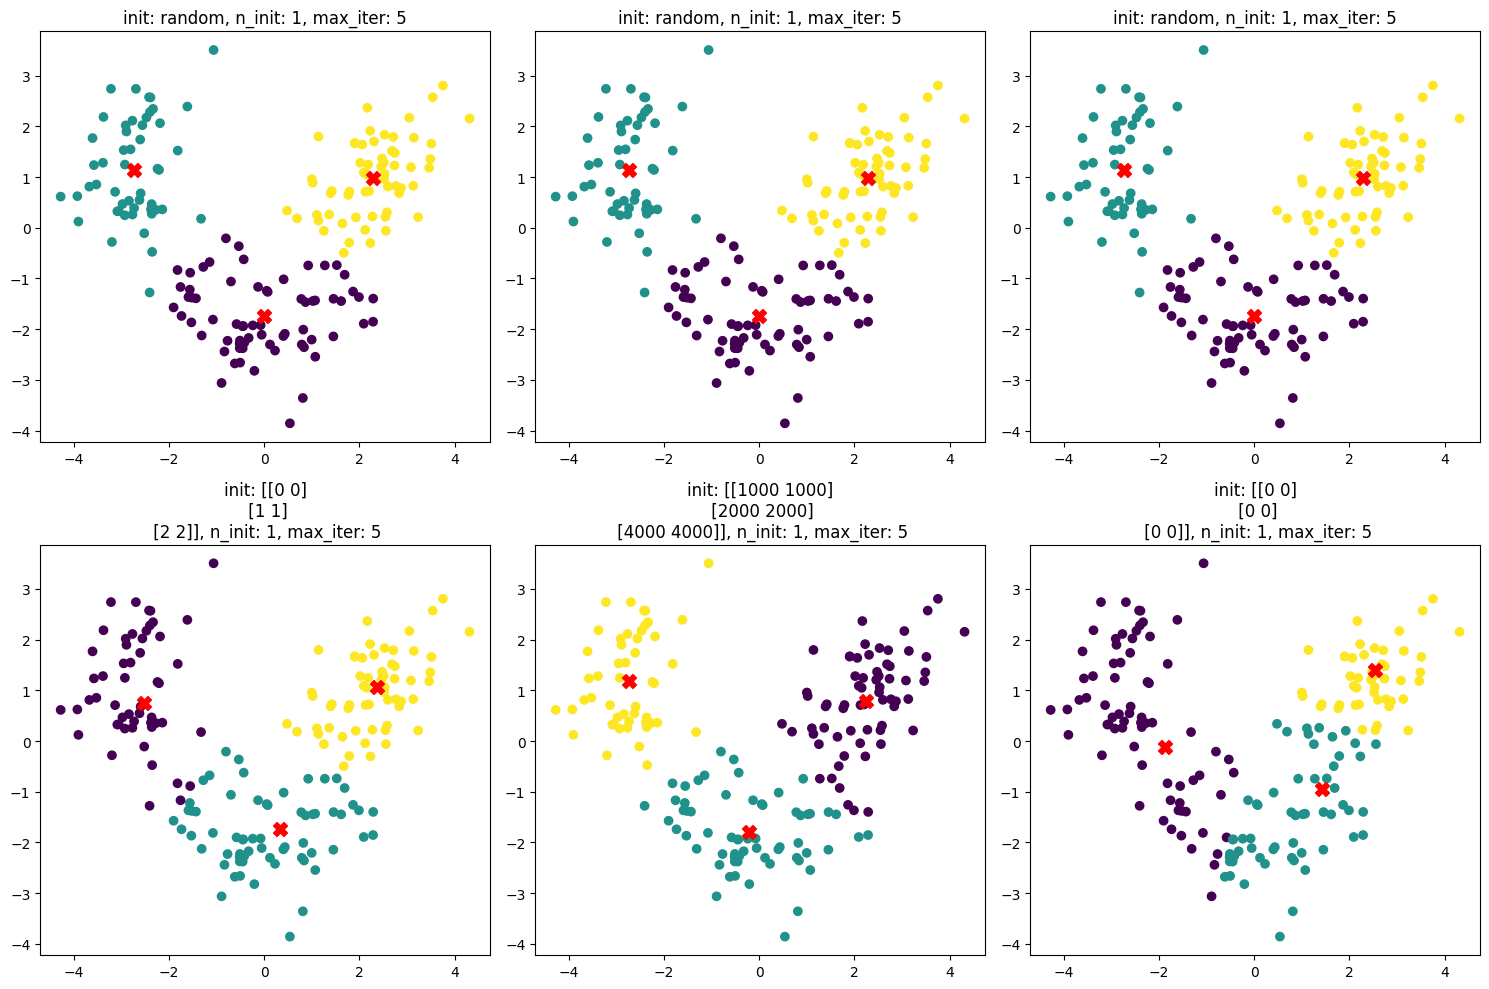

In [7]:
# Задание параметров для исследования init
init_options = [
    ('random', 1, 5),
    ('random', 1, 5),
    ('random', 1, 5),
    (np.array([[0, 0], [1, 1], [2, 2]]), 1, 5),
    (np.array([[1000, 1000], [2000, 2000], [4000, 4000]]), 1, 5),
    (np.array([[0, 0], [0, 0], [0, 0]]), 1, 5)
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (init, n_init, max_iter) in enumerate(init_options):
    # Настройка и обучение модели K-средних с различными init параметрами
    kmeans = KMeans(n_clusters=3, init=init, n_init=n_init, max_iter=max_iter, random_state=42)
    kmeans.fit(data_pca_2d)

    # Отображение результатов кластеризации
    axes[i].scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=kmeans.labels_, cmap='viridis')
    axes[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X')
    title = f"init: {init}, n_init: {n_init}, max_iter: {max_iter}"
    axes[i].set_title(title)

plt.tight_layout()
plt.show()

Дать пояснения:
1. Как повлиял выбор параметра random на результат кластеризации?
    
    При инициализации центроидов с помощью параметра random, начальные центры кластеров выбираются случайно. Это приводит к тому, что при каждом запуске алгоритма с init='random', итоговые центроиды могут оказаться разными, даже если данные остаются одинаковыми.
    
    В верхнем ряду на графиках с init='random' видно, что результаты кластеризации слегка различаются между собой из-за случайной инициализации. В таких случаях итоговые кластеры могут быть менее стабильными, так как начальные центры могли быть выбраны неудачно.

2. Какой из вариантов оказался самым удачным и почему?

    Наиболее удачным вариантом является тот, где начальные центроиды находятся в подходящих начальных позициях. На графиках в нижнем ряду, особенно в случаях с начальной инициализацией [[0, 0], [1, 1], [2, 2]] центры кластеров сразу располагаются близко к оптимальным местам. Это приводит к более точной и быстрой сходимости алгоритма, так как начальные центры изначально находятся ближе к истинным центрам кластеров.

3. Влияет ли параметр max_iter на результат кластеризации?

    Параметр max_iter ограничивает максимальное количество итераций для сходимости алгоритма. Если количество итераций слишком маленькое, алгоритм может не успеть сходиться к хорошему решению, особенно если начальные центроиды выбраны неудачно.

    Увеличение max_iter увеличивает шанс достижения хорошей сходимости, особенно если начальная инициализация не идеальна.



5. Определите наилучшее количество кластеров методом локтя

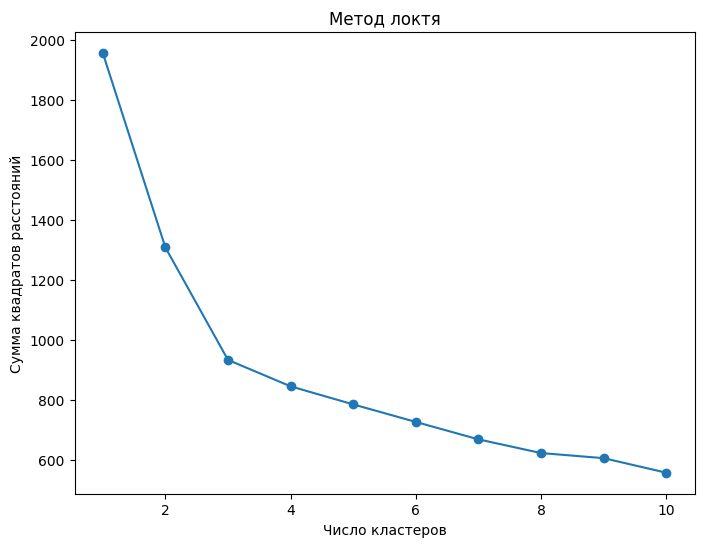

In [8]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Метод локтя')
plt.show()

Дать пояснения:
1. Что означает результат WCSS?

    WCSS - это показатель, который отражает, насколько плотно точки сгруппированы внутри каждого кластера. Чем ниже значение WCSS, тем меньше расстояния между точками внутри одного кластера и его центром. На графике по оси Y показана сумма квадратов расстояний между каждой точкой и центром её кластера для разных значений числа кластеров.

2. Почему найденное количество кластеров является наилучшим?

    Суть этого метода заключается в том, что по мере увеличения числа кластеров значение WCSS уменьшается, так как точки распределяются более точно. Однако после определённого количества кластеров снижение WCSS начинает замедляться и становится менее значительным. На графике это место выглядит как "локоть".

    На графике точка локтя соответсвует 3 кластерам, потому что именно после этой точки темп уменьшения WCSS значительно снижается.



6. Проведите кластеризацию используя пакетную кластеризацию k-средних.

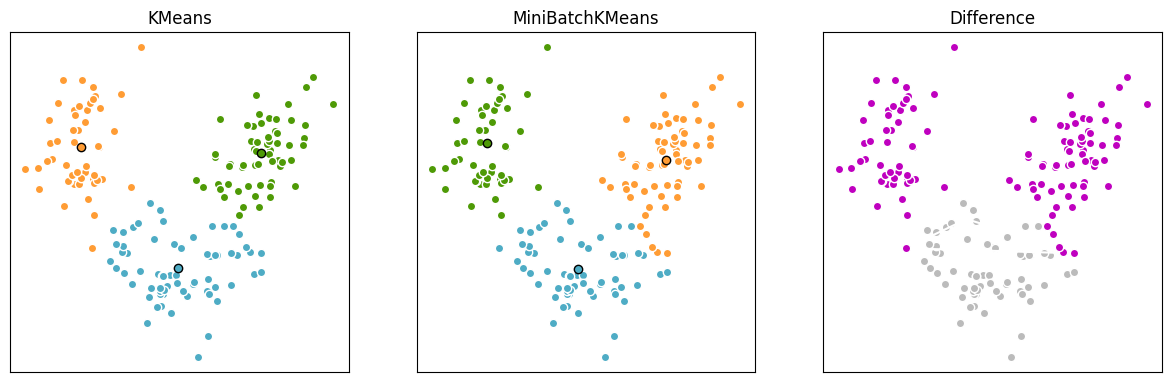

In [9]:
from sklearn.cluster import MiniBatchKMeans

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_pca)

mini_kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
mini_kmeans.fit(data_pca)

k_means_labels = kmeans.labels_
k_means_cluster_centers = kmeans.cluster_centers_
mbk_means_labels = mini_kmeans.labels_
mbk_means_cluster_centers = mini_kmeans.cluster_centers_

fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(data_pca[my_members, 0], data_pca[my_members, 1], "w", markerfacecolor=col, marker="o")
    ax.plot(cluster_center[0], cluster_center[1], "o", markerfacecolor=col, markeredgecolor="k", markersize=6)
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = (mbk_means_labels == k)
    cluster_center = mbk_means_cluster_centers[k]
    ax.plot(data_pca[my_members, 0], data_pca[my_members, 1], "w", markerfacecolor=col, marker="o")
    ax.plot(cluster_center[0], cluster_center[1], "o", markerfacecolor=col, markeredgecolor="k", markersize=6)
ax.set_title("MiniBatchKMeans")
ax.set_xticks(())
ax.set_yticks(())

# Сравнение различий между метками KMeans и MiniBatchKMeans
different = np.zeros_like(k_means_labels, dtype=bool)
for k in range(n_clusters):
    different |= (k_means_labels == k) != (mbk_means_labels == k)

identical = ~different
ax = fig.add_subplot(1, 3, 3)
ax.plot(data_pca[identical, 0], data_pca[identical, 1], "w", markerfacecolor="#bbbbbb", marker="o")
ax.plot(data_pca[different, 0], data_pca[different, 1], "w", markerfacecolor="m", marker="o")
ax.set_title("Difference")
ax.set_xticks(())
ax.set_yticks(())

plt.show()

Дать пояснения:
1. В чем отличие результата пакетной кластеризации k-средних от обычного
метода k-средних?

    KMeans - классический алгоритм, который находит центры кластеров путем итеративного обновления координат центов, пока не будет достигнута сходимость. При каждом обновлении рассчитываются расстояния от каждой точки к центроидам всех кластеров, что требует значительных вычислительных ресурсов, особенно на больших объемах данных.

    MiniBatchKMeans - модификация KMeans, предназначенная для увеличения скорости работы на больших данных. Вместо использования всего набора данных, MiniBatchKMeans на каждой итерации обновляет центроиды на основе небольших случайных подвыборок данных. Это позволяет уменьшить вычислительные затраты и ускорить процесс. В результате MiniBatchKMeans может находить приближенные центроиды быстрее, чем стандартный KMeans, хотя точность может немного снижаться из-за использования подвыборок.

    MiniBatchKMeans может давать незначительно отличающиеся результаты по сравнению с обычным KMeans, особенно если данные распределены сложным образом. В зависимости от размера батчей и распределения данных различия могут быть едва заметны или более выражены.

2. Чем отличаются построенное графическое представление?

    График KMeans показывает результат обычного метода K-средних. Точки разделены по кластерам, и центроиды расположены, как правило, точно, исходя из всего набора данных.

    График MiniBatchKMeans отображает результат пакетной кластеризации. Кластеры визуально похожи на кластеры, полученные методом KMeans, но центроиды могут немного отличаться из-за использования батчей для обновлений.

    График Difference иллюстрирует различия между кластеризацией MiniBatchKMeans и KMeans. Точки, показанные фиолетовым, обозначают объекты, которые были распределены в разные кластеры двумя методами. Серые точки остаются в одинаковых кластерах для обоих методов. Этот график наглядно демонстрирует, где методы расходятся в результатах кластеризации.

    Оба метода дают схожие результаты для данного набора данных, однако MiniBatchKMeans иногда может распределить объекты по кластерам иначе, чем стандартный KMeans.


# Иерархическая кластеризация

1. Провести и отобразить иерархическую кластеризацию на тех же данных с параметром average


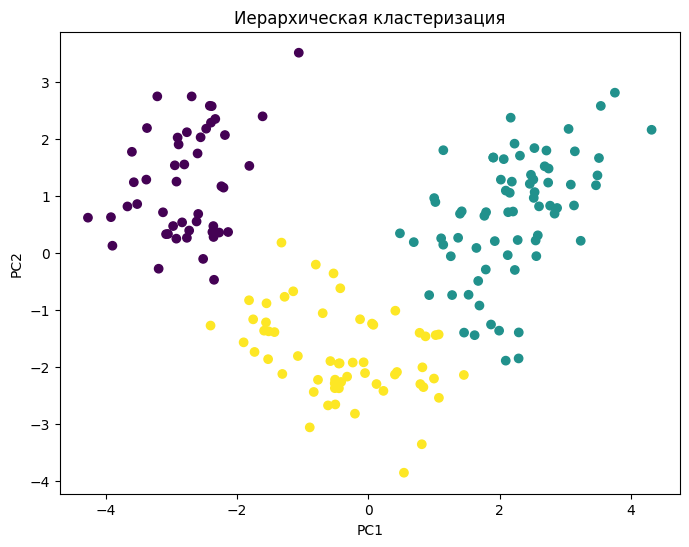

In [10]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=3, linkage='average')
agglomerative_labels = agglomerative.fit_predict(data_pca)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=agglomerative_labels, cmap='viridis')
plt.title("Иерархическая кластеризация")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

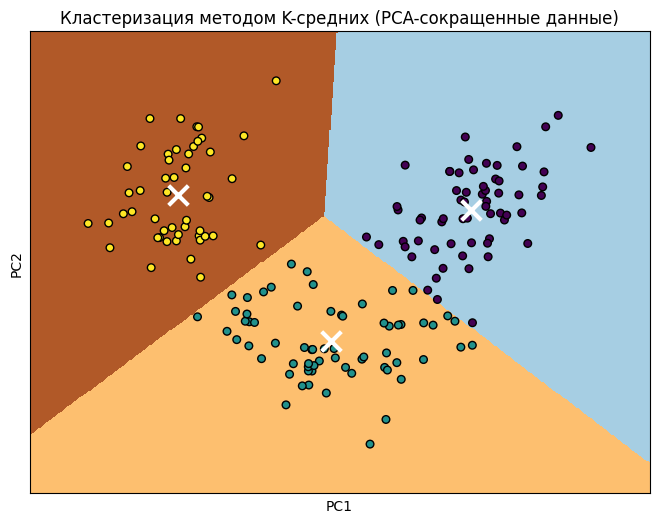

Пояснения:
1. Чем отличаются результаты (графическое изображение), полученные по методу KMeans и AgglomerativeClustering?

    KMeans делит данные на кластеры, пытаясь минимизировать внутрикластерные расстояния до центров кластеров. Это приводит к тому, что форма кластеров становится приблизительно сферической (если использовать стандартный вариант KMeans).

    AgglomerativeClustering с параметром average объединяет кластеры, минимизируя средние расстояния между точками кластеров, что может приводить к кластерным структурам более сложной формы. При этом иерархический метод не требует указывать начальные центры, как KMeans, и работает путем последовательного объединения точек.


2. Какой из методов дал более точные результаты для заданных исходных данных и почему?

    На графике видно, что метод KMeans четко разделяет пространство на три зоны, каждая из которых соответствует одному кластеру. Границы кластеров имеют линейную форму, что характерно для метода KMeans

    Визуально на графике видно, что AgglomerativeClustering также удачно разделил данные на три кластера. Но границы кластеров менее жесткие и не имеют явно выраженных прямолинейных разделений. Это может лучше подойти для данных с более сложной формой кластеров, когда объекты не обязательно распределены вокруг четко выраженных центров.

    В данном случае оба метода, по графикам, дают схожие результаты, но в зависимости от структуры данных можно заметить, что AgglomerativeClustering может более гибко отражать структуру кластеров, если данные не полностью сферичны или имеют неравномерное распределение


2. Проведите исследование для различного размера кластеров (от 2 до 5).Приведите полученные результаты


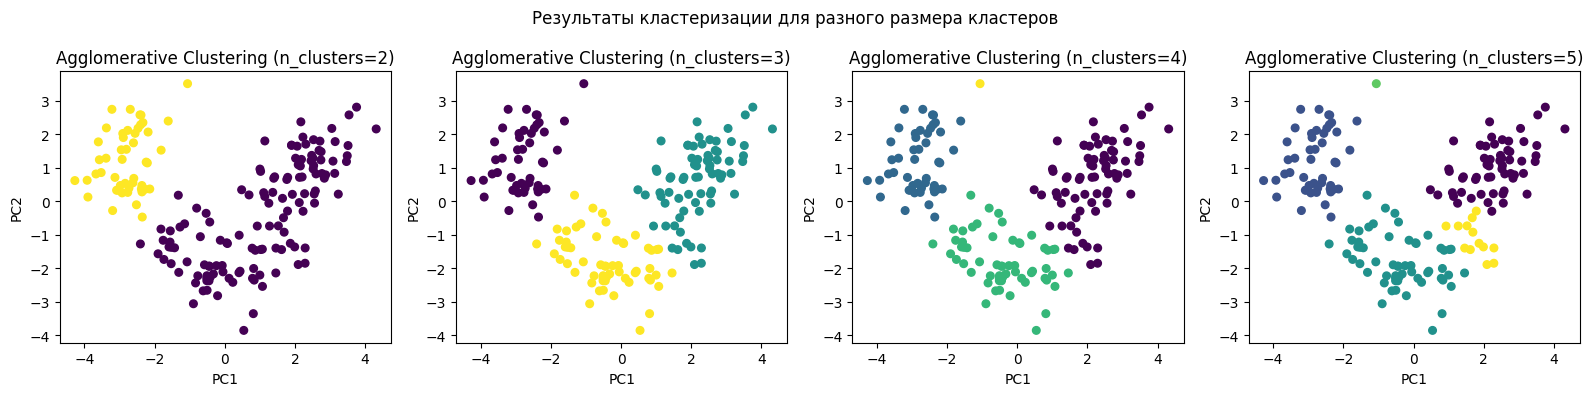

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

cluster_range = range(2, 6)
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, n_clusters in enumerate(cluster_range):
    agglom = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    labels = agglom.fit_predict(data_pca)

    axes[i].scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=30)
    axes[i].set_title(f'Agglomerative Clustering (n_clusters={n_clusters})')
    axes[i].set_xlabel("PC1")
    axes[i].set_ylabel("PC2")

plt.suptitle("Результаты кластеризации для разного размера кластеров")
plt.tight_layout()
plt.show()

Дать пояснения:
1. Какой из значений параметра n_clusters дал наилучшие результаты и почему?

    2 кластера: данные разбиваются на две крупные группы, однако такая разбивка слишком обобщенная и не учитывает внутреннюю структуру данных. Этот вариант не раскрывает более детальные подгруппы.

    3 кластера: данные разделяются на три группы, что, исходя из визуализации, хорошо отражает основные кластеры в данных. Кластеры выглядят компактными и разделены по естественным группам, что, вероятно, соответствует их истинной структуре. Этот результат можно считать оптимальным, так как он позволяет выделить основные кластеры без излишнего дробления.

    4 кластера: некоторые кластеры делятся на дополнительные подгруппы, но это не всегда оправдано с точки зрения структуры данных. Например, в центральной области данные начинают дробиться, хотя эти точки могут логично принадлежать одному кластеру.

    5 кластеров: наблюдается дальнейшее разделение, и часть точек начинает образовывать небольшие кластеры на периферии. Такое дробление создает лишние кластеры, которые могут представлять шум, а не настоящие группы данных.

    Наилучший результат был получен при n_clusters=3. Это значение параметра позволяет выделить три естественных кластера в данных, не создавая избыточного количества групп. Точки внутри каждого кластера выглядят достаточно близко друг к другу, а кластеры — хорошо отделены друг от друга, что указывает на правильный выбор числа кластеров.


3. Постройте дендограмму до уровня 6


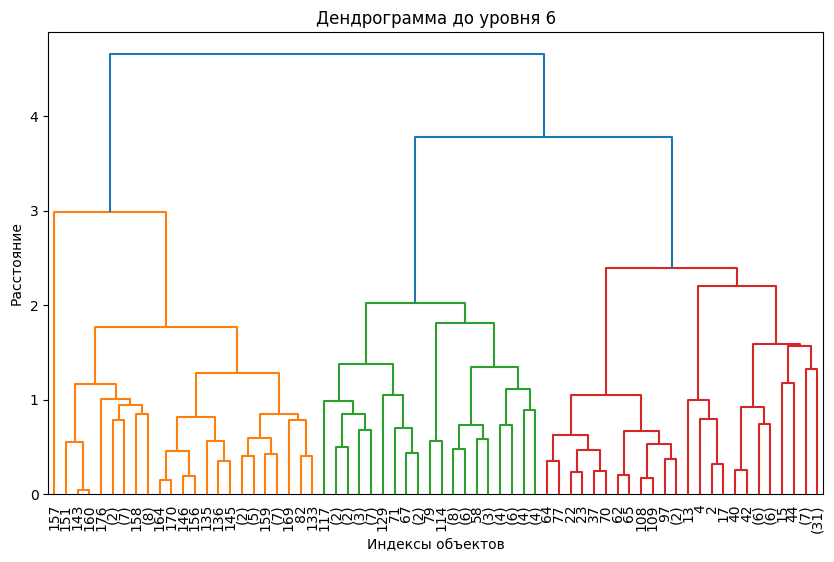

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data_pca, method='average')

plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=6, leaf_rotation=90, leaf_font_size=10)
plt.title("Дендрограмма до уровня 6")
plt.xlabel("Индексы объектов")
plt.ylabel("Расстояние")
plt.show()

4. Сгенерируйте случайные данные (x,y) в виде двух квадратных контуров

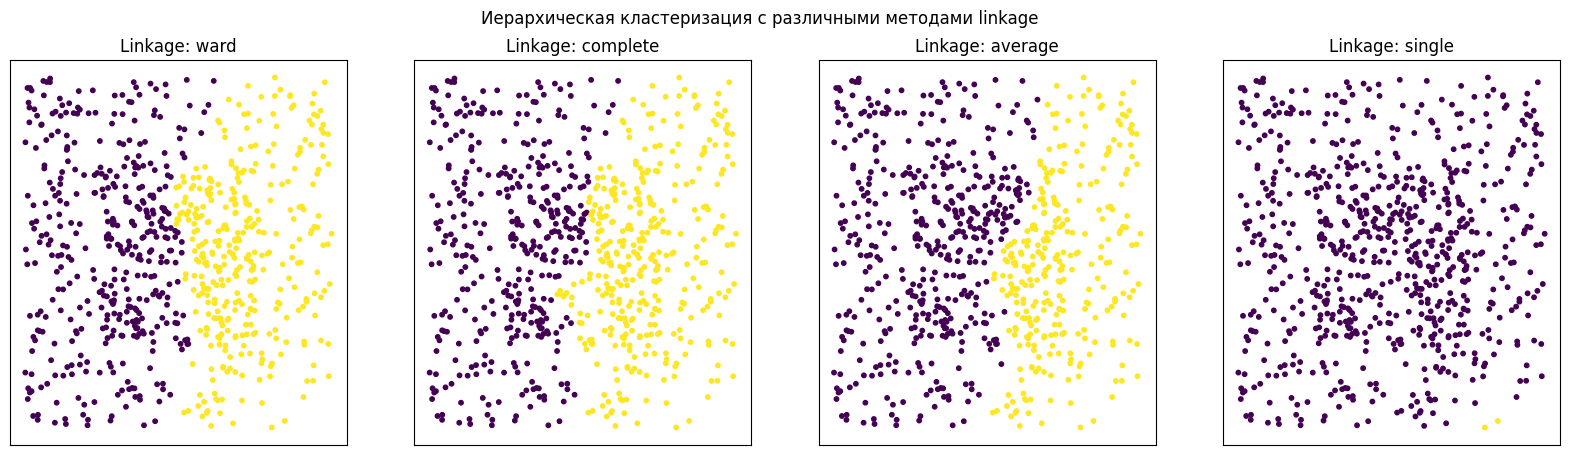

In [13]:
np.random.seed(42)

outer_square = np.vstack([
    np.random.uniform(-10, 10, size=(125, 2)),
    np.random.uniform(-10, 10, size=(125, 2)),
    np.random.uniform(-10, 10, size=(125, 2)),
    np.random.uniform(-10, 10, size=(125, 2))
])

inner_square = np.vstack([
    np.random.uniform(-5, 5, size=(63, 2)),
    np.random.uniform(-5, 5, size=(62, 2)),
    np.random.uniform(-5, 5, size=(62, 2)),
    np.random.uniform(-5, 5, size=(63, 2))
])

X = np.vstack([outer_square, inner_square])

linkage_methods = ['ward', 'complete', 'average', 'single']

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle("Иерархическая кластеризация с различными методами linkage")

for i, method in enumerate(linkage_methods):
    clustering = AgglomerativeClustering(n_clusters=2, linkage=method)
    labels = clustering.fit_predict(X)

    axes[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    axes[i].set_title(f"Linkage: {method}")
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.show()

Дать пояснения:
1. Какой тип связи работает лучше всего и почему?

Метод Ward стремится минимизировать разницу внутри кластеров на каждом шаге объединения. Этот метод обычно лучше работает, когда кластеры компактные и имеют одинаковую плотность. На графике видно, что метод Ward смог выделить два крупных квадрата довольно четко, что соответствует цели разделения на два контура (внешний и внутренний квадрат).

Метод Complete (или "полной связи") стремится максимизировать минимальное расстояние между точками в разных кластерах. Этот метод склонен к созданию более вытянутых кластеров, чем метод Ward, но иногда он может "размывать" кластеры.
На графике видно, что метод Complete тоже справился с выделением внешнего и внутреннего квадратов, но граница разделения менее четкая, чем у метода Ward.
Плюсы: Хорошо работает с вытянутыми кластерами.
Минусы: Может создавать менее четкие границы, если кластеры перекрываются.
Average:

Метод Average объединяет кластеры на основе среднего расстояния между точками в кластерах. Этот метод является более "сглаженным" и менее чувствительным к шуму, чем метод Complete, но иногда может смешивать кластеры, особенно если они имеют сложные формы.
На графике видно, что метод Average также выделил оба квадрата, но с некоторыми пограничными областями, где кластеры могут смешиваться.
Плюсы: Более устойчив к шуму, чем Complete и Single.
Минусы: Менее четкое разделение кластеров, если границы между ними не четко выражены.
Single:

Метод Single (или "минимального расстояния") объединяет кластеры на основе минимального расстояния между точками в кластерах. Этот метод склонен к образованию вытянутых, цепочкообразных кластеров и часто "смешивает" данные в единый кластер.
На графике видно, что метод Single не справился с разделением внешнего и внутреннего квадратов и сформировал размытую границу, которая практически не разделяет контуры.
Плюсы: Хорошо подходит для выделения длинных и узких структур.
Минусы: Очень чувствителен к шуму и часто формирует цепочки, что приводит к размытым или нечетким кластерам.
Вывод:
Наиболее удачным методом для данного набора данных оказался Ward, так как он формирует четкие, компактные кластеры, соответствующие структуре данных (внутренний и внешний квадрат).